In [1]:
library(ggplot2)
library(xtable)
library(dplyr)
library(ggfortify)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Read data and remove NAs
nazare = na.omit(read.csv("data/Nazare.csv"))
jaws = na.omit(read.csv("data/Jaws.csv"))

In [3]:
summary(nazare[,2:3])

      Wave             Wind       
 Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 1.600   1st Qu.: 5.000  
 Median : 2.100   Median : 8.000  
 Mean   : 2.414   Mean   : 8.666  
 3rd Qu.: 3.000   3rd Qu.:11.000  
 Max.   :11.400   Max.   :38.000  

In [4]:
# Save summary tables
print(xtable(summary(nazare[,2:3])), file = "tables/summary_nazare.tex", compress = FALSE, floating=FALSE, latex.environments=NULL, booktabs=TRUE)
print(xtable(summary(jaws[,2:3])), file = "tables/summary_jaws.tex", compress = FALSE, floating=FALSE, latex.environments=NULL, booktabs=TRUE)

# Plots

In [5]:
nazare.plt.gg <- ggplot(nazare)

# WIND
nazare.plt.qq_wind <- nazare.plt.gg + 
    stat_qq(aes(sample=Wind)) + stat_qq_line(aes(sample=Wind)) +
    labs(title="Normal QQ plot, Nazaré Wind")

nazare.plt.hist_wind <- nazare.plt.gg +
    geom_histogram(aes(x=Wind)) +
    labs(title="Histogram Nazaré Wind")

#WAVE
nazare.plt.qq_wave <- nazare.plt.gg + 
    stat_qq(aes(sample=Wave)) + stat_qq_line(aes(sample=Wave)) +
    labs(title="Normal QQ plot, Nazaré Wave")

nazare.plt.hist_wave <- nazare.plt.gg +
    geom_histogram(aes(x=Wave)) +
    labs(title="Histograma altura olas en Nazaré", x="Altura Ola (m)", y="Recuento")

# Scatter
aes_ = aes(x=Wind, y=Wave)
nazare.plt.smooth <- nazare.plt.gg +
    geom_jitter(aes_) + stat_density_2d(aes_) + geom_smooth(aes_) +
    labs(title="Viento y Olas, Nazré", x="Velocidad del viento (nudos)", y = "Altura Olas (m)")

nazare.plt.bin2d <- nazare.plt.gg +
    geom_bin2d(aes_, binwidth=c(1,0.1)) + 
    scale_fill_viridis_c("", option="plasma") +
    labs(title="Viento y Olas, Nazaré", x="Velocidad del viento (nudos)", y = "Altura Olas (m)")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


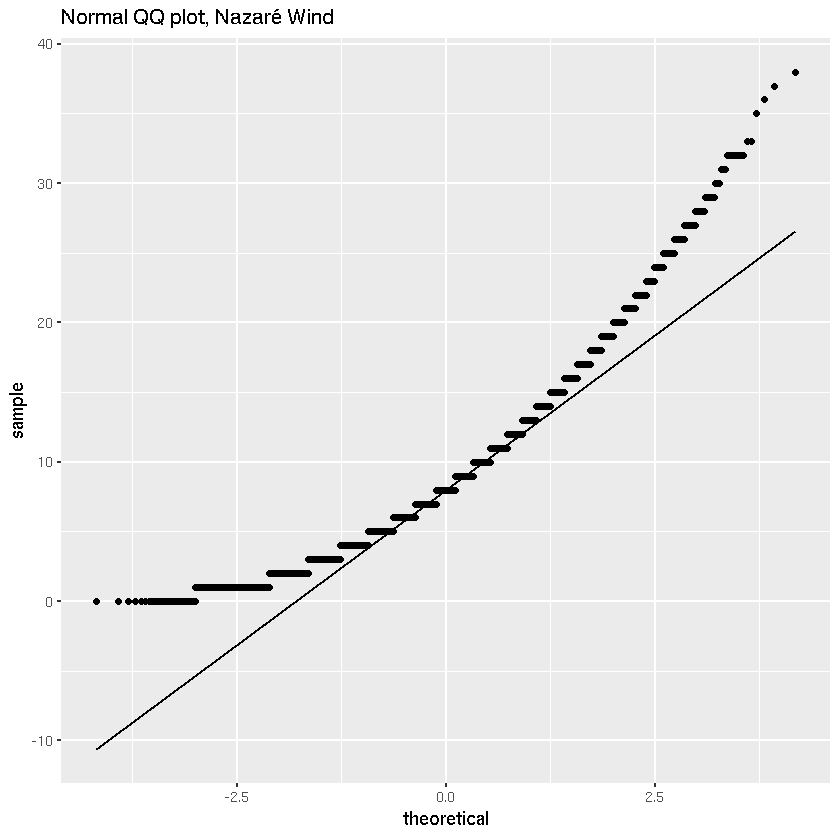

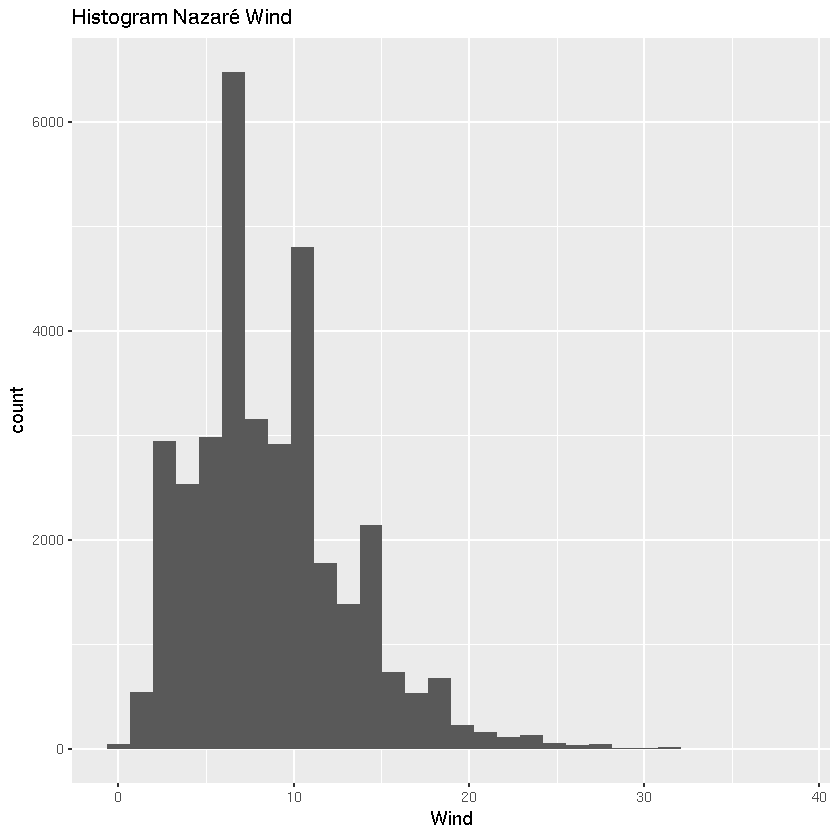

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


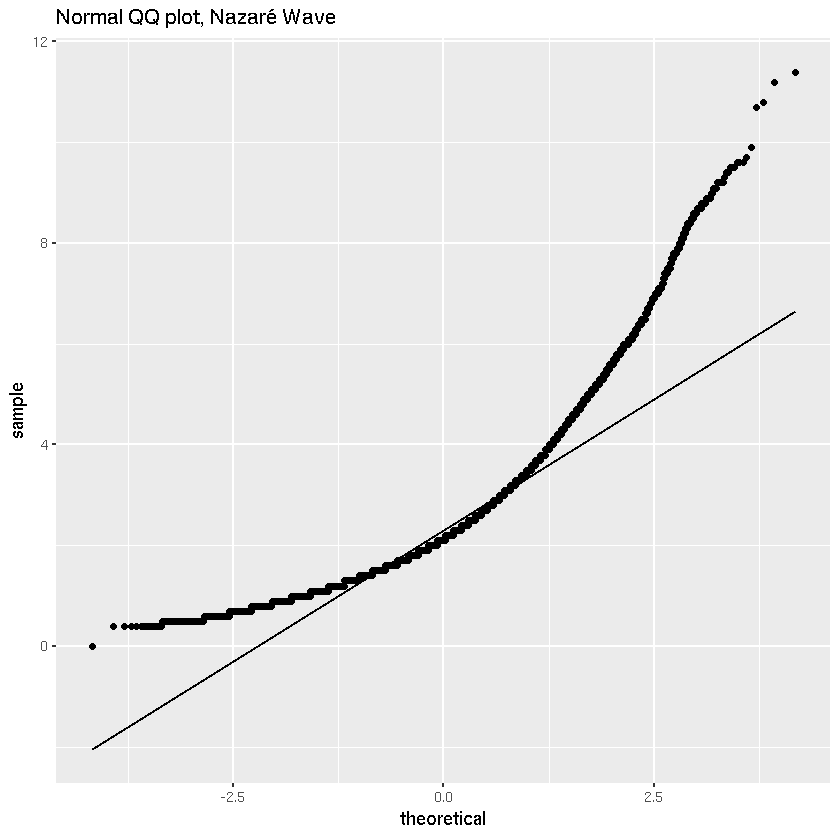

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”

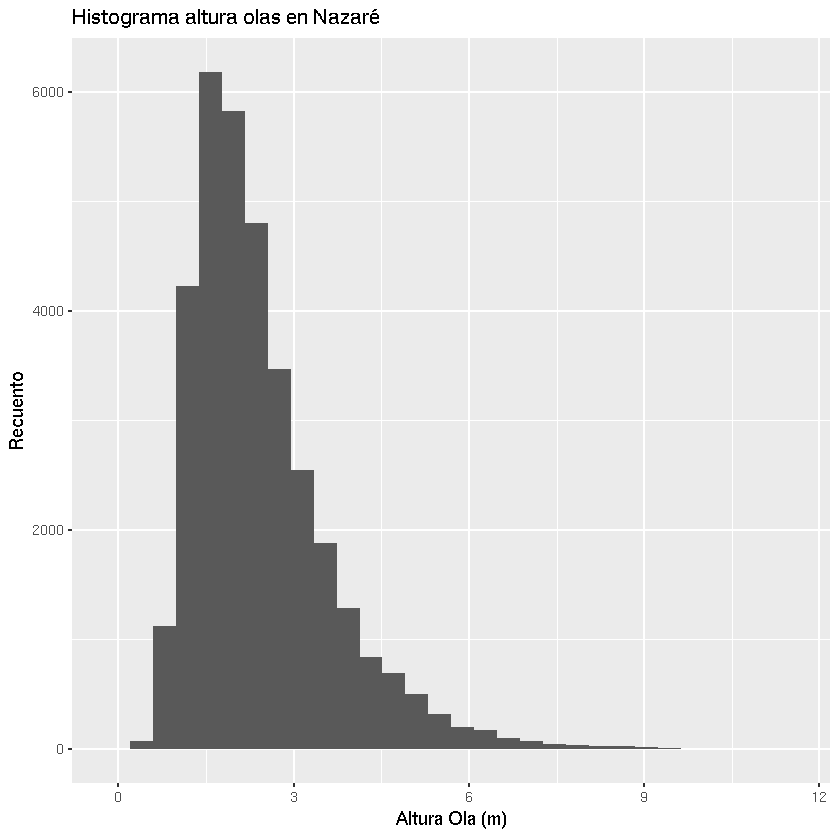

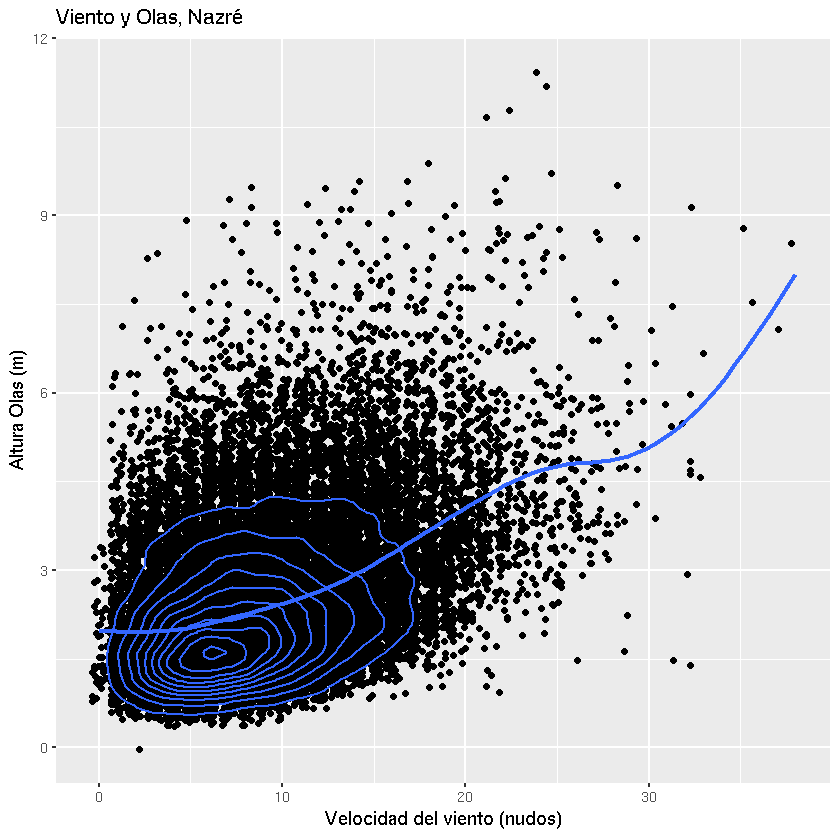

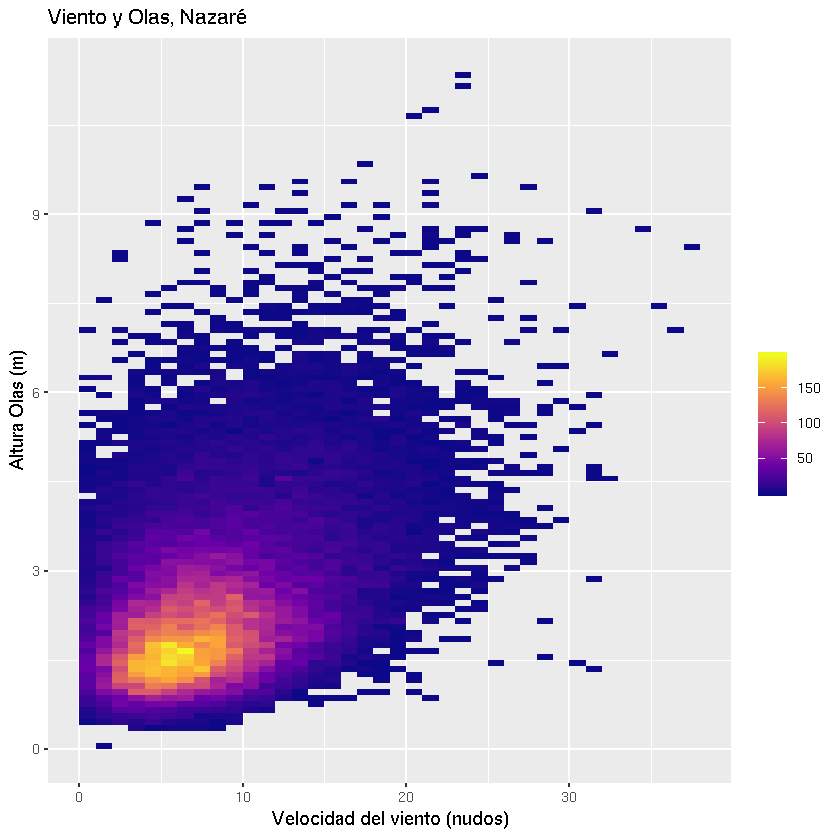

In [6]:
nazare.plt.qq_wind
nazare.plt.hist_wind
nazare.plt.qq_wave
nazare.plt.hist_wave
nazare.plt.smooth
nazare.plt.bin2d

In [7]:
# Save plots
ggsave("nazare_qq_wind.pdf", path="figures", plot=nazare.plt.qq_wind, width=9, height=7, units='cm')
ggsave("nazare_hist_wind.pdf", path="figures", plot=nazare.plt.hist_wind, width=9, height=7, units='cm')

ggsave("nazare_qq_wave.pdf", path="figures", plot=nazare.plt.qq_wave, width=9, height=7, units='cm')
ggsave("nazare_hist_wave.pdf", path="figures", plot=nazare.plt.hist_wave, width=9, height=7, units='cm')

ggsave("nazare_smooth.pdf", path="figures", plot=nazare.plt.smooth, width=12, height=12, units='cm')
ggsave("nazare_bin2d.pdf", path="figures", plot=nazare.plt.bin2d, width=12, height=12, units='cm')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


In [8]:
jaws.plt.gg <- ggplot(jaws)

# WIND
jaws.plt.qq_wind <- jaws.plt.gg + 
    stat_qq(aes(sample=Wind)) + stat_qq_line(aes(sample=Wind)) +
    labs(title="Normal QQ plot, Jaws Wind")

jaws.plt.hist_wind <- jaws.plt.gg +
    geom_histogram(aes(x=Wind)) +
    labs(title="Histogram Jaws Wind")

#WAVE
jaws.plt.qq_wave <- jaws.plt.gg + 
    stat_qq(aes(sample=Wave)) + stat_qq_line(aes(sample=Wave)) +
    labs(title="Normal QQ plot, Jaws Wave")

jaws.plt.hist_wave <- jaws.plt.gg +
    geom_histogram(aes(x=Wave)) +
    labs(title="Histograma altura olas en Jaws", x="Altura Ola (m)", y="Recuento")

# Scatter
aes_ = aes(x=Wind, y=Wave)
jaws.plt.smooth <- jaws.plt.gg +
    geom_jitter(aes_) + stat_density_2d(aes_) + geom_smooth(aes_) +
    labs(title="Jaws")

jaws.plt.bin2d <- jaws.plt.gg +
    geom_bin2d(aes_, binwidth=c(1,0.1)) + 
    scale_fill_viridis_c("", option="plasma") +
    labs(title="Viento y Olas, Jaws", x="Velocidad del viento (nudos)", y = "Altura Olas (m)")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


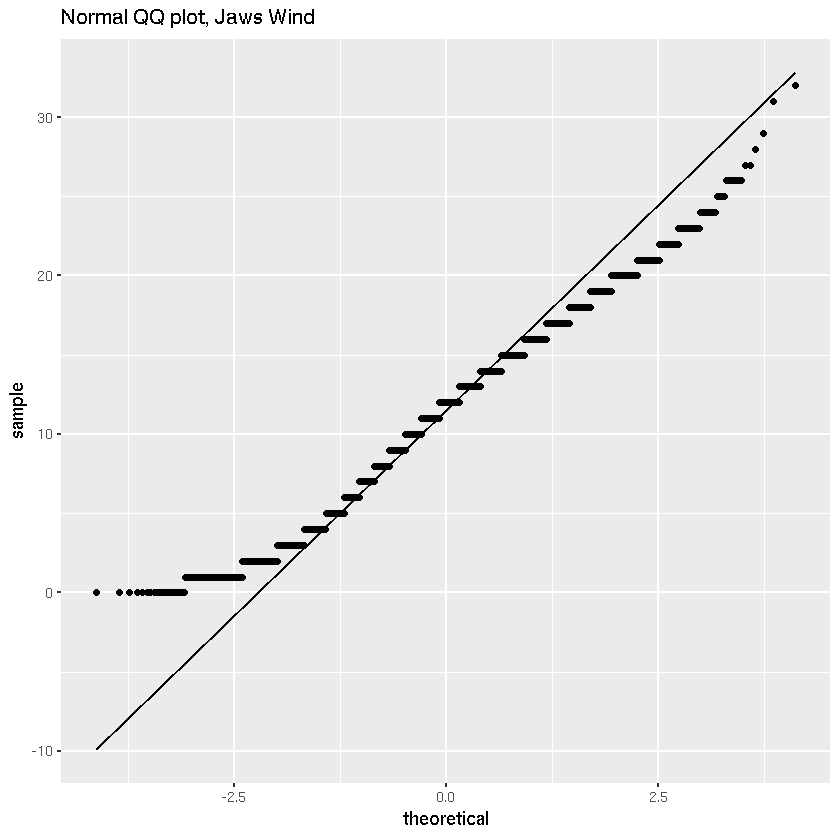

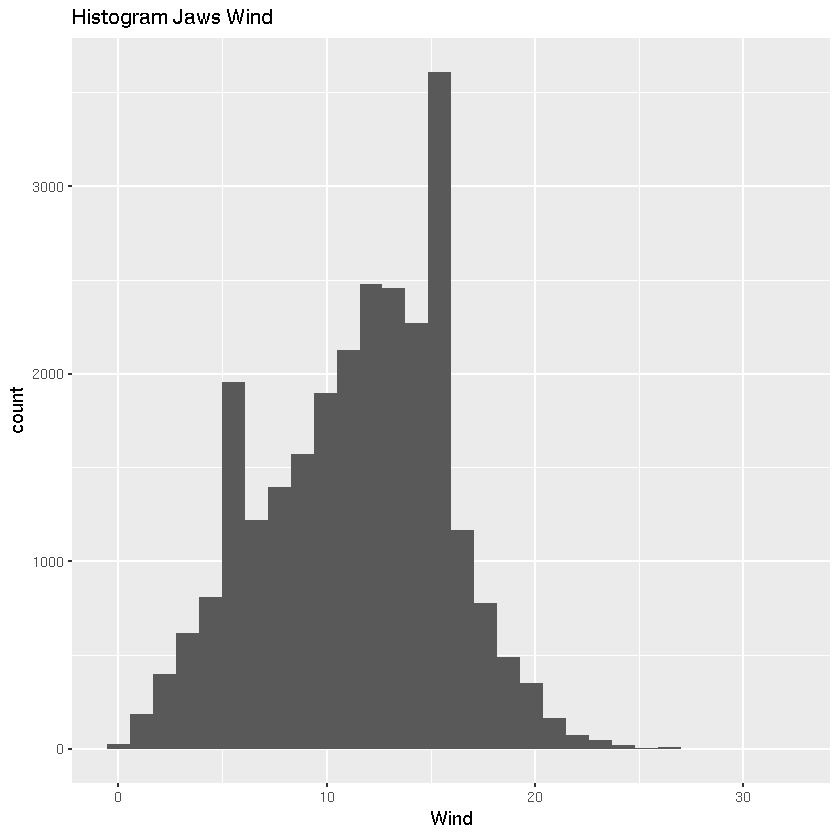

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


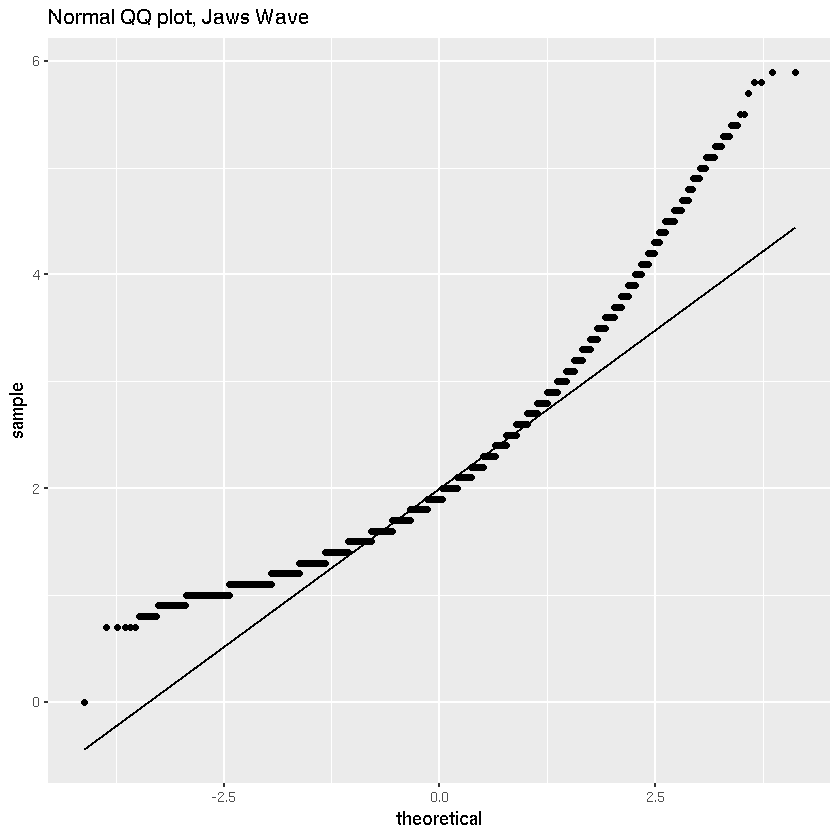

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”

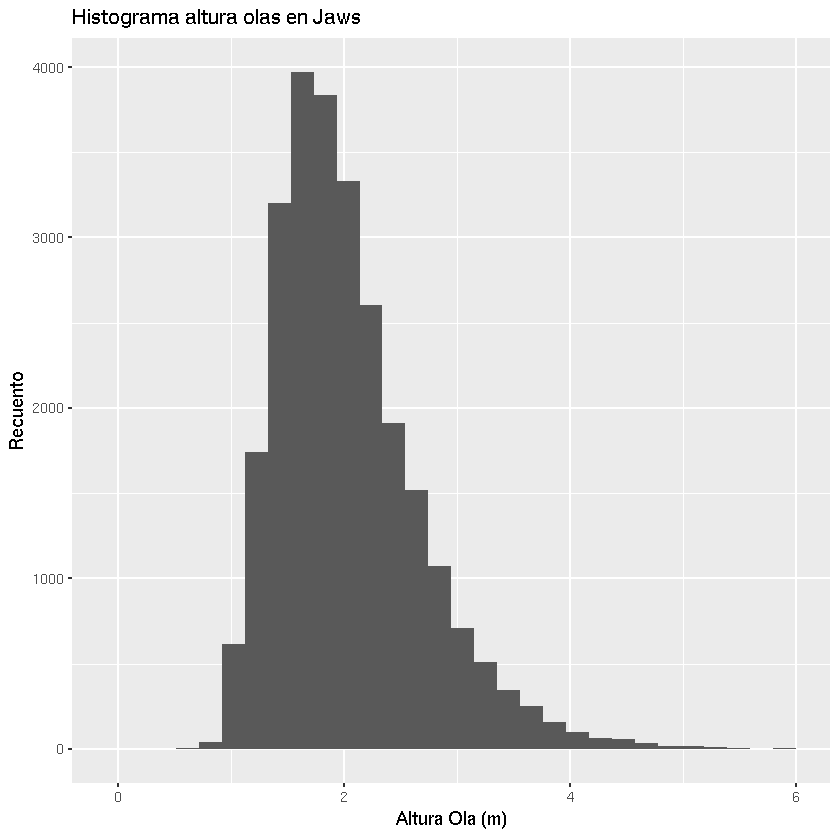

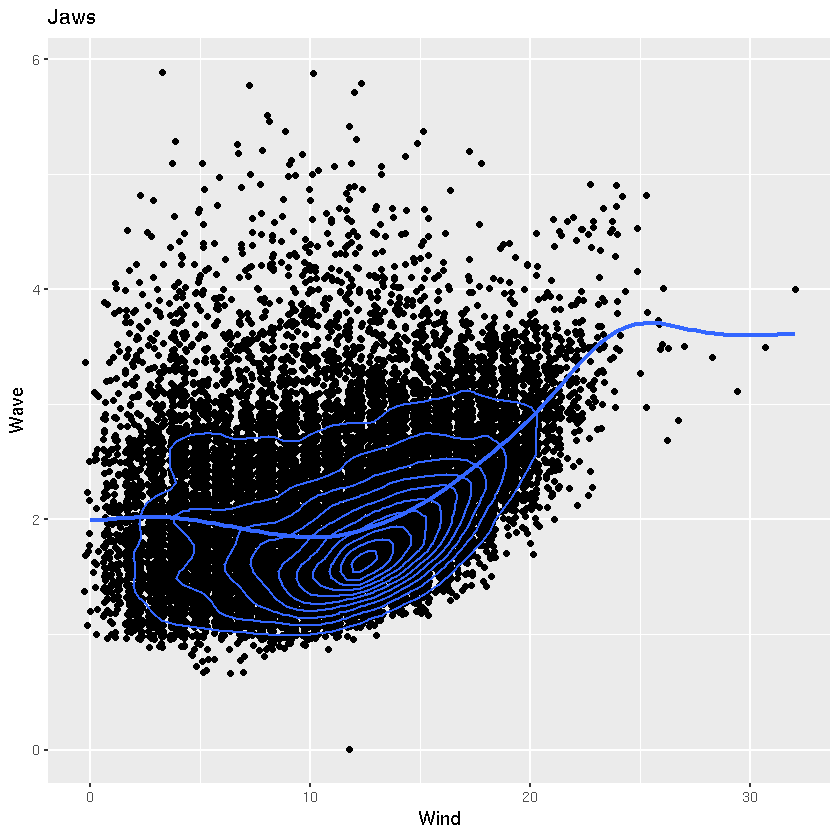

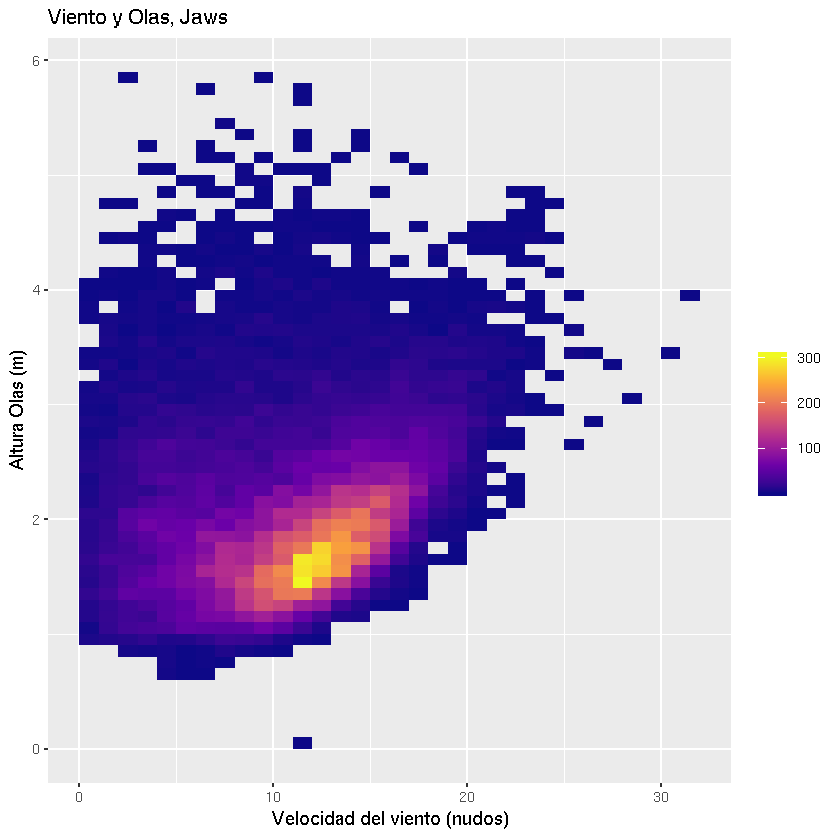

In [9]:
jaws.plt.qq_wind
jaws.plt.hist_wind
jaws.plt.qq_wave
jaws.plt.hist_wave
jaws.plt.smooth
jaws.plt.bin2d

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”

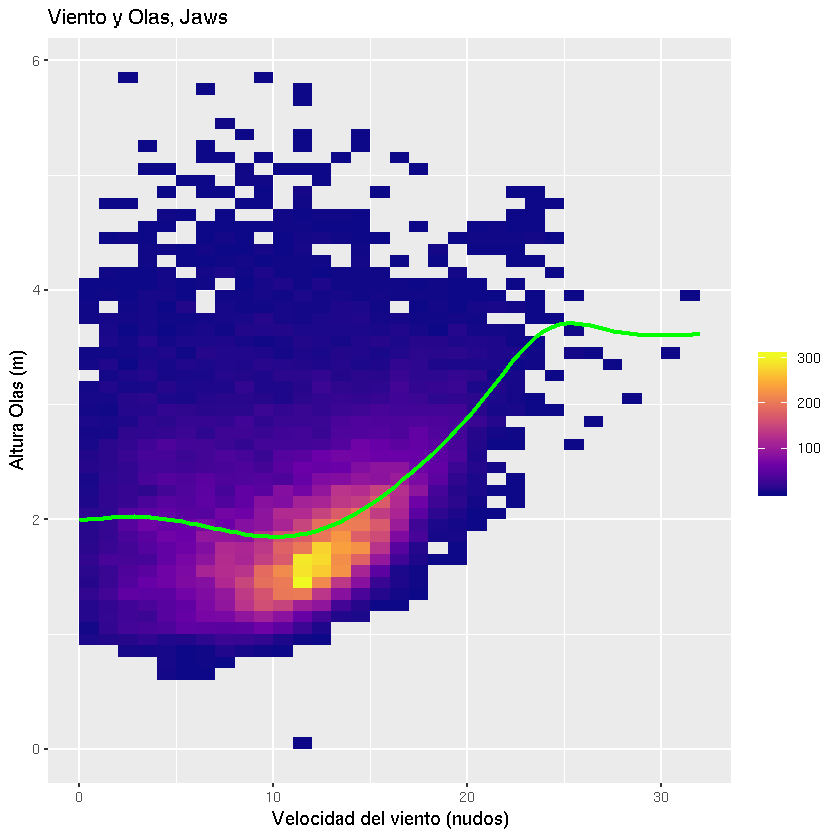

In [10]:
jaws.plt.bin2d + geom_smooth(aes_, color="green")

In [11]:
# Save plots
ggsave("jaws_qq_wind.pdf", path="figures", plot=jaws.plt.qq_wind, width=9, height=7, units='cm')
ggsave("jaws_hist_wind.pdf", path="figures", plot=jaws.plt.hist_wind, width=9, height=7, units='cm')

ggsave("jaws_qq_wave.pdf", path="figures", plot=jaws.plt.qq_wave, width=9, height=7, units='cm')
ggsave("jaws_hist_wave.pdf", path="figures", plot=jaws.plt.hist_wave, width=9, height=7, units='cm')


ggsave("jaws_smooth.pdf", path="figures", plot=jaws.plt.smooth, width=12, height=12, units='cm')
ggsave("jaws_bin2d.pdf", path="figures", plot=jaws.plt.bin2d, width=12, height=12, units='cm')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


## Box Plots

In [12]:
boxplot_wave <- nazare.plt.gg +
    geom_boxplot(aes(y=Wave, x="Nazare", fill="Nazare")) +
    geom_boxplot(data=jaws, aes(y=Wave, x="Jaws", fill="Jaws")) + ylim(0, 6.5) +
    scale_colour_manual(name="Location",
    values=c(Nazare="red", Jaws="blue")) +
    labs(title="Wave", y="Altura olas (metros)", x="Surf Spots")

boxplot_wind <- nazare.plt.gg +
    geom_boxplot(data=nazare, aes(y=Wind, x="Nazare", fill="Nazare")) +
    geom_boxplot(data=jaws, aes(y=Wind, x="Jaws", fill="Jaws")) + 
    scale_colour_manual(name="Location",
    values=c(Nazare="red", Jaws="blue")) +
    labs(title="Wind", y="Velocidad del viento(nudos)", x="Surf Spots")

Warning message:
“Removed 288 rows containing non-finite values (stat_boxplot).”

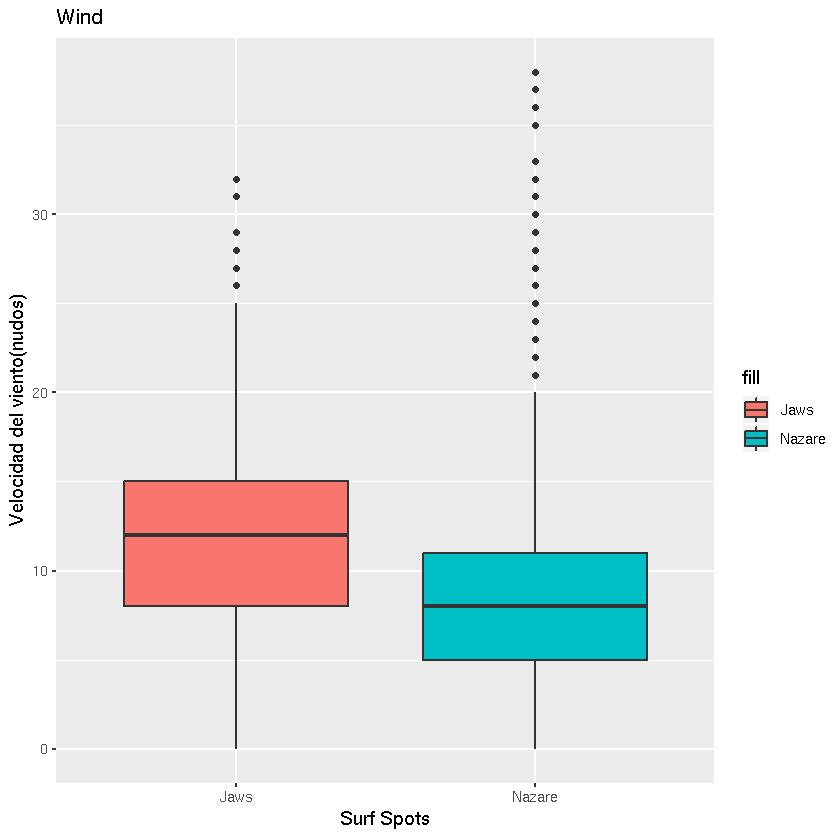

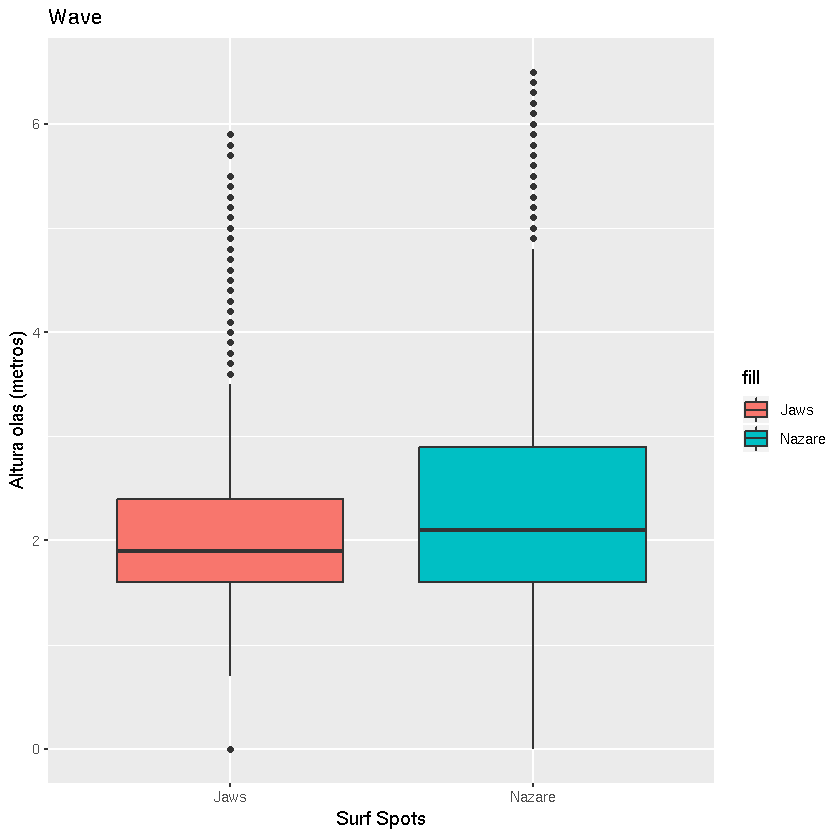

In [13]:
boxplot_wind
boxplot_wave

In [14]:
# Save plots
ggsave("boxplot_wind.pdf", path="figures", plot=boxplot_wind, width=7, height=7, units='cm')
ggsave("boxplot_wave.pdf", path="figures", plot=boxplot_wave, width=7, height=7, units='cm')

Warning message:
“Removed 288 rows containing non-finite values (stat_boxplot).”

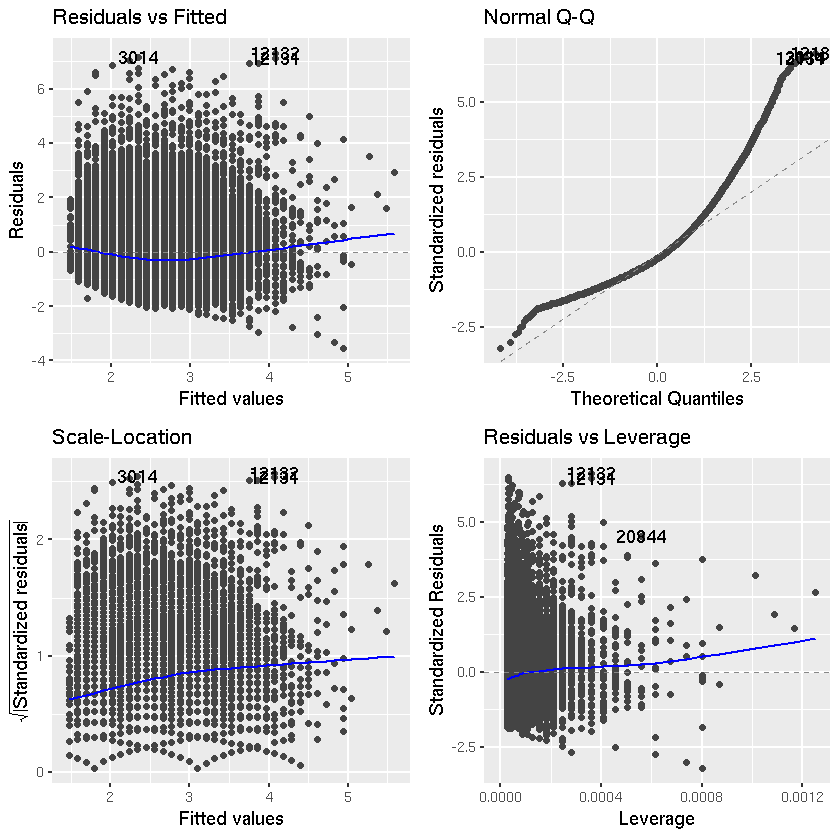

In [15]:
# Nazare all lineal regression
nazare.lr = lm(Wave ~ Wind, data = nazare)
autoplot(nazare.lr)


Call:
lm(formula = Wave ~ Wind, data = jaws)

Coefficients:
(Intercept)         Wind  
    1.60669      0.03841  


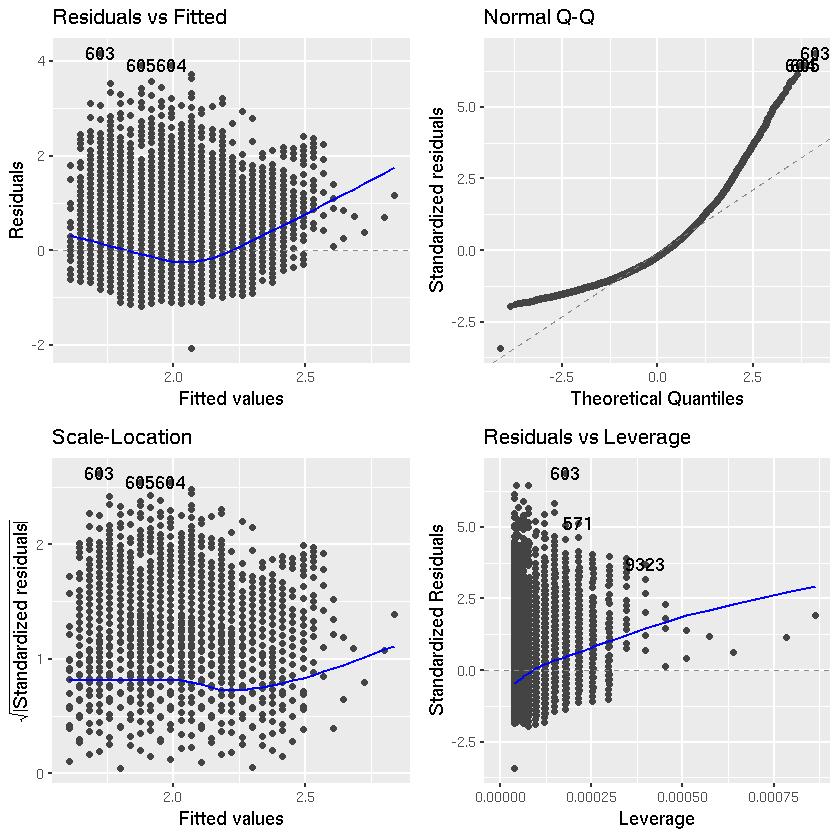

In [16]:
# Jaws all lineal regression
jaws.lr = lm(Wave ~ Wind, data = jaws)
autoplot(jaws.lr)

jaws.lr

# SubSample

In [17]:
# Filter by hour of the day
time_between <- function (time, a, b) {
    h <- as.numeric(format(as.POSIXct(time), "%H"))
    (h >= a & h <= b)
}

set.seed(41)
nazare_500 <- sample_n(subset(nazare, time_between(Time, 8, 17)), 500) # 500 samples between 8 and 17 h
summary(nazare_500[,2:3])

set.seed(42)
jaws_500 <- sample_n(subset(nazare, time_between(Time, 8, 17)), 500) # 500 samples between 8 and 17 h
summary(jaws_500[,2:3])

      Wave            Wind       
 Min.   :0.700   Min.   : 0.000  
 1st Qu.:1.600   1st Qu.: 5.000  
 Median :2.100   Median : 8.000  
 Mean   :2.456   Mean   : 8.976  
 3rd Qu.:3.000   3rd Qu.:12.000  
 Max.   :8.800   Max.   :36.000  

      Wave            Wind       
 Min.   :0.400   Min.   : 1.000  
 1st Qu.:1.500   1st Qu.: 5.000  
 Median :2.100   Median : 8.000  
 Mean   :2.325   Mean   : 8.732  
 3rd Qu.:2.800   3rd Qu.:11.000  
 Max.   :8.600   Max.   :27.000  

In [18]:
print(xtable(summary(nazare_500[,2:3])), file = "tables/summary_nazare500.tex", compress = FALSE, floating=FALSE, latex.environments=NULL, booktabs=TRUE)
print(xtable(summary(jaws_500[,2:3])), file = "tables/summary_jaws500.tex", compress = FALSE, floating=FALSE, latex.environments=NULL, booktabs=TRUE)

In [19]:
nazare_500.lr = lm(Wave ~ Wind, data = nazare_500)
nazare_500.lr
nazare_500.plt.lm <- autoplot(nazare_500.lr)

nazare_500.plt.gg <- ggplot(nazare_500, aes(x=Wind, y=Wave))
nazare_500.plt.lm_fit <- nazare_500.plt.gg +
    geom_jitter() + geom_smooth(method=lm) +
    labs(title="Nazare 500")

confint.lm(nazare_500.lr)


Call:
lm(formula = Wave ~ Wind, data = nazare_500)

Coefficients:
(Intercept)         Wind  
     1.5454       0.1015  


,2.5 %,97.5 %
(Intercept),1.32523469,1.7655020
Wind,0.07992095,0.1230273


In [20]:
ggsave("nazare_500_lm.pdf", path="figures", plot=nazare_500.plt.lm, width=12, height=12, units='cm')
ggsave("nazare_500_lmFit.pdf", path="figures", plot=nazare_500.plt.lm_fit, width=12, height=12, units='cm')

In [21]:
jaws_500.lr = lm(Wave ~ Wind, data = jaws_500)
jaws_500.lr
jaws_500.plt.lm <- autoplot(jaws_500.lr)

jaws_500.plt.gg <- ggplot(jaws_500, aes(x=Wind, y=Wave))
jaws_500.plt.lm_fit <- jaws_500.plt.gg +
    geom_jitter() + geom_smooth(method=lm) +
    labs(title="jaws 500")

confint.lm(jaws_500.lr)


Call:
lm(formula = Wave ~ Wind, data = jaws_500)

Coefficients:
(Intercept)         Wind  
     1.3610       0.1104  


,2.5 %,97.5 %
(Intercept),1.15779634,1.5641978
Wind,0.08961688,0.1311809


In [22]:
ggsave("jaws_500_lm.pdf", path="figures", plot=jaws_500.plt.lm, width=12, height=12, units='cm')
ggsave("jaws_500_lmFit.pdf", path="figures", plot=jaws_500.plt.lm_fit, width=12, height=12, units='cm')

In [23]:
t.test(nazare$Wave, jaws$Wave, vas.equal=T)
t.test(nazare_500$Wave, jaws_500$Wave, vas.equal=T)


	Welch Two Sample t-test

data:  nazare$Wave and jaws$Wave
t = 48.37, df = 54318, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3519233 0.3816483
sample estimates:
mean of x mean of y 
 2.413791  2.047005 



	Welch Two Sample t-test

data:  nazare_500$Wave and jaws_500$Wave
t = 1.6972, df = 984.19, p-value = 0.08998
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02050262  0.28290262
sample estimates:
mean of x mean of y 
   2.4562    2.3250 


In [24]:
t.test(nazare_500$Wind,  mu=mean(nazare$Wind))
t.test(nazare_500$Wave,  mu=mean(nazare$Wave))


	One Sample t-test

data:  nazare_500$Wind
t = 1.4225, df = 499, p-value = 0.1555
alternative hypothesis: true mean is not equal to 8.66567
95 percent confidence interval:
 8.547392 9.404608
sample estimates:
mean of x 
    8.976 



	One Sample t-test

data:  nazare_500$Wave
t = 0.73359, df = 499, p-value = 0.4635
alternative hypothesis: true mean is not equal to 2.413791
95 percent confidence interval:
 2.342617 2.569783
sample estimates:
mean of x 
   2.4562 


In [25]:
t.test(jaws_500$Wind,  mu=mean(jaws$Wind))
t.test(jaws_500$Wave,  mu=mean(jaws$Wave))


	One Sample t-test

data:  jaws_500$Wind
t = -13.864, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 11.46251
95 percent confidence interval:
 8.345043 9.118957
sample estimates:
mean of x 
    8.732 



	One Sample t-test

data:  jaws_500$Wave
t = 5.4166, df = 499, p-value = 9.464e-08
alternative hypothesis: true mean is not equal to 2.047005
95 percent confidence interval:
 2.224164 2.425836
sample estimates:
mean of x 
    2.325 
